## Goal

Analyze a stock price dataset end-to-end by preparing clean, reliable data and extracting actionable insights through exploratory analysis and visual reporting. The focus is on improving data quality (missing values, data types, outliers) and understanding key relationships and trends in price variables.

## Dataset summary

**Dataset type:** Daily stock price data
**Rows/Columns:** ~3,019 rows × 7 columns (before cleaning)
**Key fields:** Date, Open, High, Low, Close, Volume, Name
**Main purpose:** Support descriptive analytics—trend patterns, distribution checks, and correlation relationships (e.g., Open vs Close; High vs Low).

## Tools used

**Python:** pandas, numpy
**Visualization:** matplotlib, seaborn
**Statistics:** scipy/stats (e.g., Z-score for outlier detection)
**Environment:** Jupyter Notebook

## What you’ll deliver

**Data cleaning & preparation**

  * Convert Date to datetime format
  * Handle missing values and confirm duplicates
  * Detect and treat outliers (Z-score method)
  * 
**Exploratory Data Analysis (EDA)**

  * Summary statistics and distribution checks
  * Correlation analysis and relationship exploration
    
  **Charts & visuals**

  * Trend plots (Open/Close over time)
  * Correlation heatmap
  * Scatterplots (Open vs Close, High vs Low)
 **Insights & recommendations**

  * 3+ key findings supported by visuals/statistics
  * Practical recommendations based on observed trends and relationships


In [45]:
# necessary libraries needed for the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [51]:
#import Fluffy toys LTD data set for analysis
data =pd.read_csv('Fluffy.csv',header=0, sep=",")
data

,Date,Open,High,Low,Close,Volume,Name
0,01/03/2006,39.69,41.22,38.79,40.91,24232729,Fluffy
1,01/04/2006,41.22,41.90,40.77,40.97,20553479,Fluffy
2,01/05/2006,40.93,41.73,40.85,41.53,12829610,Fluffy
3,01/06/2006,42.88,43.57,42.80,43.21,29422828,Fluffy
4,01/09/2006,43.10,43.66,42.82,43.42,16268338,Fluffy
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,Fluffy
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,Fluffy
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,Fluffy
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,Fluffy


In [53]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Name]
Index: []


In [55]:
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 0


In [57]:
#checking the first 5 rows and columns
print(data.head())

         Date   Open   High    Low  Close    Volume    Name
0  01/03/2006  39.69  41.22  38.79  40.91  24232729  Fluffy
1  01/04/2006  41.22  41.90  40.77  40.97  20553479  Fluffy
2  01/05/2006  40.93  41.73  40.85  41.53  12829610  Fluffy
3  01/06/2006  42.88  43.57  42.80  43.21  29422828  Fluffy
4  01/09/2006  43.10  43.66  42.82  43.42  16268338  Fluffy


In [59]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3013 non-null   float64
 2   High    3016 non-null   float64
 3   Low     3015 non-null   float64
 4   Close   3014 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB
None


In [61]:
#converting data to dateset format
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,Fluffy
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,Fluffy
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,Fluffy
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,Fluffy
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,Fluffy
...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,Fluffy
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,Fluffy
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,Fluffy
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,Fluffy


In [63]:
# checking for missing values
print(data.isnull().sum())  


Date      0
Open      6
High      3
Low       4
Close     5
Volume    0
Name      0
dtype: int64


In [21]:
print(data.isnull().sum().sum())

18


In [65]:
# Droping the missing the values. Data Cleaning
data.dropna(axis=0 ,inplace=True)
data


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,Fluffy
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,Fluffy
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,Fluffy
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,Fluffy
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,Fluffy
...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,Fluffy
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,Fluffy
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,Fluffy
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,Fluffy


In [25]:
print(data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [27]:
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,01/03/2006,39.69,41.22,38.79,40.91,24232729,Fluffy
1,01/04/2006,41.22,41.90,40.77,40.97,20553479,Fluffy
2,01/05/2006,40.93,41.73,40.85,41.53,12829610,Fluffy
3,01/06/2006,42.88,43.57,42.80,43.21,29422828,Fluffy
4,01/09/2006,43.10,43.66,42.82,43.42,16268338,Fluffy


In [27]:
data.tail()

,Date,Open,High,Low,Close,Volume,Name
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,Fluffy
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,Fluffy
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,Fluffy
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,Fluffy
3018,2017-12-29,69.79,70.13,69.43,69.85,6613070,Fluffy


8 rows have been drop from the 3019 rows which is 0.6% of the dataset which cannot have an impact on my analyis. In most cases dropping 1% of a data set will not have any impact on your data analsis.
This has change the dataset from 3019 row by 7 columns to 3001 rows by 7 columns

In [29]:
# basic statistics on the dataset
# Basic summary statistics for numerical variables
data.describe()

  

,Date,Open,High,Low,Close,Volume
count,3001,3001.000000,3001.000000,3001.000000,3001.000000,3.001000e+03
mean,2012-01-03 11:45:50.683105536,28.415928,28.755571,28.055775,28.402009,2.157963e+07
min,2006-01-03 00:00:00,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,2009-01-05 00:00:00,16.170000,16.380000,15.970000,16.130000,1.247918e+07
50%,2012-01-05 00:00:00,27.190000,27.500000,26.840000,27.120000,1.731192e+07
75%,2015-01-02 00:00:00,36.660000,37.050000,36.310000,36.640000,2.509909e+07
max,2017-12-29 00:00:00,73.020000,73.250000,72.460000,72.930000,4.382317e+08
std,NaN,13.228585,13.328533,13.128591,13.229601,1.929556e+07


In [31]:
data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,Fluffy
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,Fluffy
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,Fluffy
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,Fluffy
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,Fluffy
...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,Fluffy
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,Fluffy
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,Fluffy
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,Fluffy


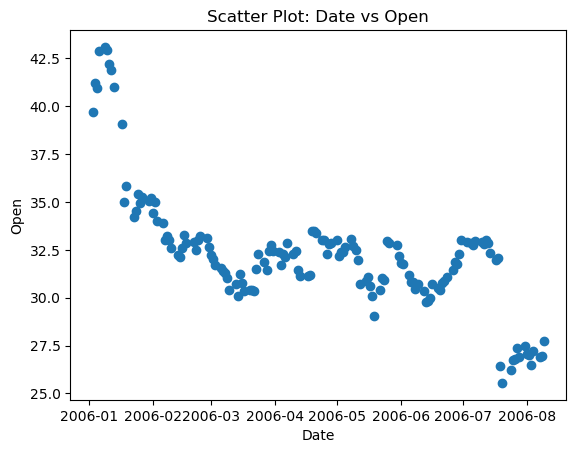

In [33]:
# A scatter plot to identifer outliers in Open price

plt.scatter(data['Date'].head(150), data['Open'].head(150))
plt.title('Scatter Plot: Date vs Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [37]:

df_clean = data['Open']
# Calculate z-scores for 'Open' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'Open':", total_outliers)


Total outliers identified using z-score method for 'Open': 43


In [39]:
df_clean = data['Close']
# Calculate z-scores for 'Close' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'Close':", total_outliers)

Total outliers identified using z-score method for 'Close': 45


In [28]:
# Replacing outliers in Open prices with their mean value

mean_value = data['Open'].mean()
std_dev = data['Open'].std()

# Define a threshold for Z-score (commonly 3)
threshold = 3

# Identify outliers using Z-score
data['Z_score'] = (data['Open'] - mean_value) / std_dev
outliers = data.loc[abs(data['Z_score']) > threshold, 'Open']

# Replace outliers with the mean value
data.loc[abs(data['Z_score']) > threshold, 'Open'] = mean_value

data

,Date,Open,High,Low,Close,Volume,Name,Z_score
0,2006-01-03,39.690000,41.22,38.79,40.91,24232729,Fluffy,0.851179
1,2006-01-04,41.220000,41.90,40.77,40.97,20553479,Fluffy,0.966710
2,2006-01-05,40.930000,41.73,40.85,41.53,12829610,Fluffy,0.944812
3,2006-01-06,42.880000,43.57,42.80,43.21,29422828,Fluffy,1.092057
4,2006-01-09,43.100000,43.66,42.82,43.42,16268338,Fluffy,1.108669
...,...,...,...,...,...,...,...,...
3014,2017-12-22,28.417677,71.87,71.22,71.58,10979165,Fluffy,3.247126
3015,2017-12-26,28.417677,71.39,69.63,69.86,8542802,Fluffy,3.210881
3016,2017-12-27,28.417677,70.49,69.69,70.06,6345124,Fluffy,3.122534
3017,2017-12-28,28.417677,70.32,69.51,69.82,7556877,Fluffy,3.148963


In [75]:
import os

out_dir = "outputs/tables"
os.makedirs(out_dir, exist_ok=True)

data.describe().to_csv(f"{out_dir}/summary_stats.csv")
data[['Open','High','Low','Close','Volume']].corr().to_csv(f"{out_dir}/correlation_matrix.csv")

In [69]:
df_clean = data['Open']
# Calculate z-scores for 'Open' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'Open':", total_outliers)

Total outliers identified using z-score method for 'Open': 43


In [16]:
# Replacing outliers in Open prices with their mean value

mean_value = data['Open'].mean()
std_dev = data['Open'].std()

# Define a threshold for Z-score (commonly 3)
threshold = 3

# Identify outliers using Z-score
data['Z_score'] = (data['Open'] - mean_value) / std_dev
outliers = data.loc[abs(data['Z_score']) > threshold, 'Open']

# Replace outliers with the mean value
data.loc[abs(data['Z_score']) > threshold, 'Open'] = mean_value

data

,Date,Open,High,Low,Close,Volume,Name,Z_score
0,01/03/2006,39.690000,41.22,38.79,40.91,24232729,Fluffy,1.080110
1,01/04/2006,41.220000,41.90,40.77,40.97,20553479,Fluffy,1.213901
2,01/05/2006,40.930000,41.73,40.85,41.53,12829610,Fluffy,1.188542
3,01/06/2006,42.880000,43.57,42.80,43.21,29422828,Fluffy,1.359059
4,01/09/2006,43.100000,43.66,42.82,43.42,16268338,Fluffy,1.378297
...,...,...,...,...,...,...,...,...
3014,12/22/2017,28.417677,71.87,71.22,71.58,10979165,Fluffy,0.094402
3015,12/26/2017,28.417677,71.39,69.63,69.86,8542802,Fluffy,0.094402
3016,12/27/2017,28.417677,70.49,69.69,70.06,6345124,Fluffy,0.094402
3017,12/28/2017,28.417677,70.32,69.51,69.82,7556877,Fluffy,0.094402


In [43]:
df_clean = data['Open']
# Calculate z-scores for 'Open' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'Open':", total_outliers)

Total outliers identified using z-score method for 'Open': 43


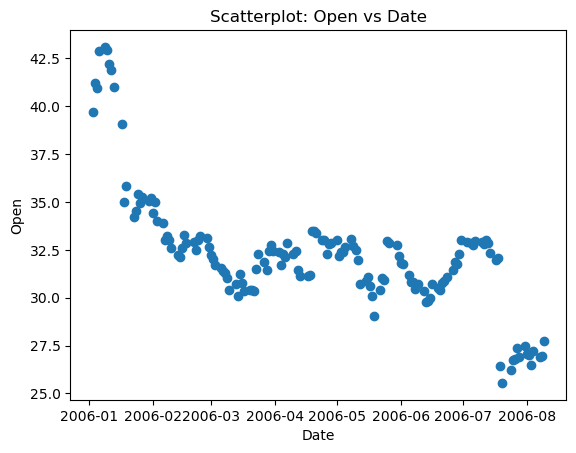

In [35]:
# A scatter plot to identifer outliers in Open price

plt.scatter(data['Date'].head(150), data['Open'].head(150)),
plt.title('Scatterplot: Open vs Date')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [45]:


df_clean = data['Close']

# Calculate z-scores for 'Open' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'Close':", total_outliers)

Total outliers identified using z-score method for 'Close': 45


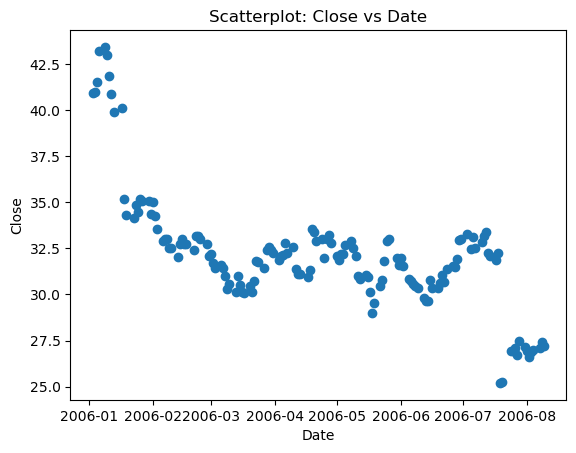

In [41]:
# A scatter plot to identifer outliers in High price

plt.scatter(data['Date'].head(150), data['Close'].head(150)),
plt.title('Scatterplot: Close vs Date')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [52]:

df_clean = data['High']

# Calculate z-scores for 'Open' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'High':", total_outliers)

Total outliers identified using z-score method for 'High': 0


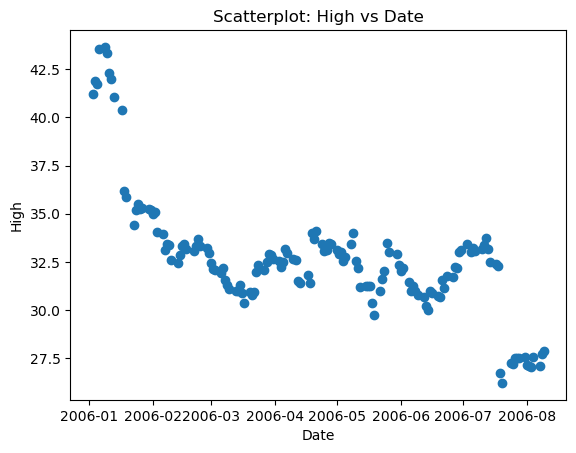

In [37]:
plt.scatter(data['Date'].head(150), data['High'].head(150)),
plt.title('Scatterplot: High vs Date')
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

In [49]:
df_clean = data['Low']

# Calculate z-scores for 'Open' column
z_scores = np.abs(stats.zscore(df_clean))

# Define threshold for outliers (z-scores greater than 3)
outlier_threshold = 3

# Boolean indexing to identify outliers
outliers_zscore = df_clean[z_scores > outlier_threshold]

# Count total outliers
total_outliers = len(outliers_zscore)

# Display total outliers
print("Total outliers identified using z-score method for 'Low':", total_outliers)

Total outliers identified using z-score method for 'Low': 46


In [56]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,3019,3013.000000,3016.000000,3015.000000,3014.000000,3.019000e+03
mean,2012-01-01 20:00:33.388539392,28.417677,28.768352,28.076299,28.399121,2.158391e+07
min,2006-01-03 00:00:00,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,2009-01-01 00:00:00,16.170000,16.380000,15.970000,16.130000,1.248025e+07
50%,2011-12-30 00:00:00,27.180000,27.490000,26.830000,27.105000,1.732130e+07
75%,2015-01-01 00:00:00,36.660000,37.027500,36.310000,36.622500,2.512757e+07
max,2017-12-29 00:00:00,73.020000,73.250000,72.460000,72.930000,4.382317e+08
std,NaN,13.243194,13.361062,13.162500,13.234456,1.926231e+07


In [51]:
# Further investigation: Correlation between 'High' and 'Low' stock prices
correlatio_of_high_and_Low = data[['High', 'Low']].corr()
print("Correlation between High and Low prices:")
print(correlatio_of_high_and_Low )



Correlation between High and Low prices:
          High       Low
High  1.000000  0.999516
Low   0.999516  1.000000


In [53]:
# Further investigation: Correlation between 'Open' and 'Close' stock prices
correlation_matrix = data[['Open', 'Close']].corr()
print("Correlation between Open and Close prices:")
print(correlation_matrix)


Correlation between Open and Close prices:
           Open     Close
Open   1.000000  0.999318
Close  0.999318  1.000000


In [55]:
# Perform a basic statistical test on the "Open" and "Close" stock prices
print("Open Price Statistics:")
print()
print(data['Open'].describe())

print()
print("Close Price Statistics:")
print()
print(data['Close'].describe())



Open Price Statistics:

count    3001.000000
mean       28.415928
std        13.228585
min         9.100000
25%        16.170000
50%        27.190000
75%        36.660000
max        73.020000
Name: Open, dtype: float64

Close Price Statistics:

count    3001.000000
mean       28.402009
std        13.229601
min         8.950000
25%        16.130000
50%        27.120000
75%        36.640000
max        72.930000
Name: Close, dtype: float64


In [57]:
# Step 8: Further investigation: Correlation between 'Open' and 'Close' stock prices
correlation_matrix = data[['Open', 'Close']].corr()
print("Correlation between Open and Close prices:")
print(correlation_matrix)



Correlation between Open and Close prices:
           Open     Close
Open   1.000000  0.999318
Close  0.999318  1.000000


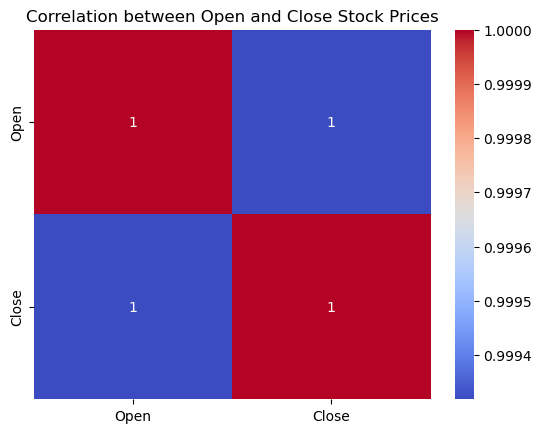

In [59]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Open and Close Stock Prices')
plt.show()


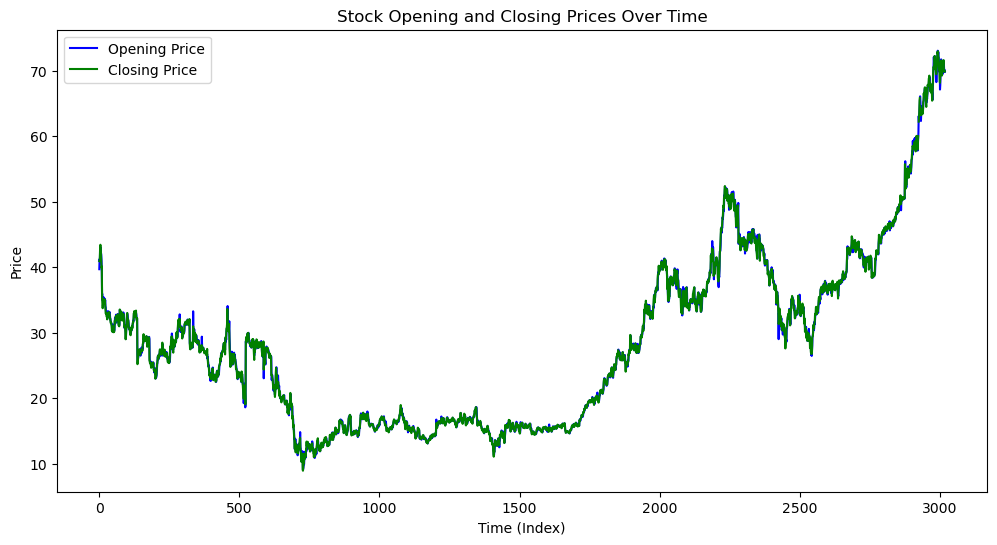

In [68]:
# Visualize the trends in Opening and Closing stock prices 
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plotting the data
plt.plot(data['Open'], label='Opening Price', color='blue')
plt.plot(data['Close'], label='Closing Price', color='green')

# Adding titles and labels
plt.title('Stock Opening and Closing Prices Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Price')

# Adding a legend to differentiate between the two plots
plt.legend()

# Display the plot
plt.show()

In [61]:
# Further investigation: Correlation between 'High' and 'Low' stock prices
correlation_matrix2 = data[['High', 'Low']].corr()
print("Correlation between High and Low prices:")
print(correlation_matrix2)

Correlation between High and Low prices:
          High       Low
High  1.000000  0.999516
Low   0.999516  1.000000


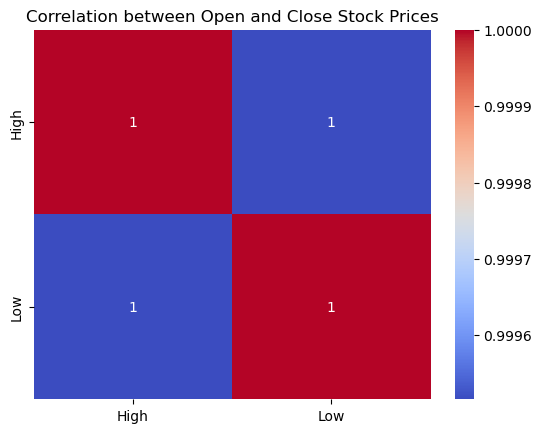

In [63]:
import seaborn as sns
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation between Open and Close Stock Prices')
plt.show()

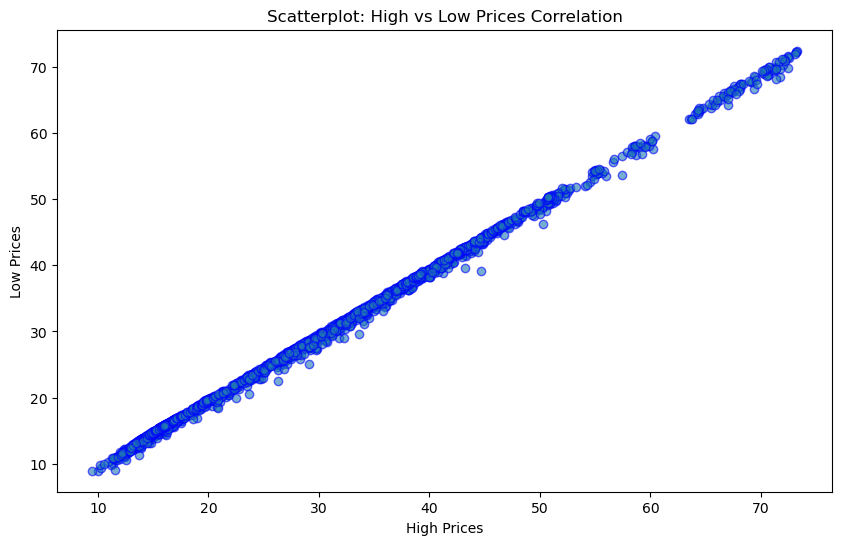

In [65]:
 #Scatterplot of 'High' vs 'Low' prices to visually inspect the correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['High'], data['Low'], alpha=0.6, edgecolors='b')
plt.title('Scatterplot: High vs Low Prices Correlation')
plt.xlabel('High Prices')
plt.ylabel('Low Prices')
plt.show()


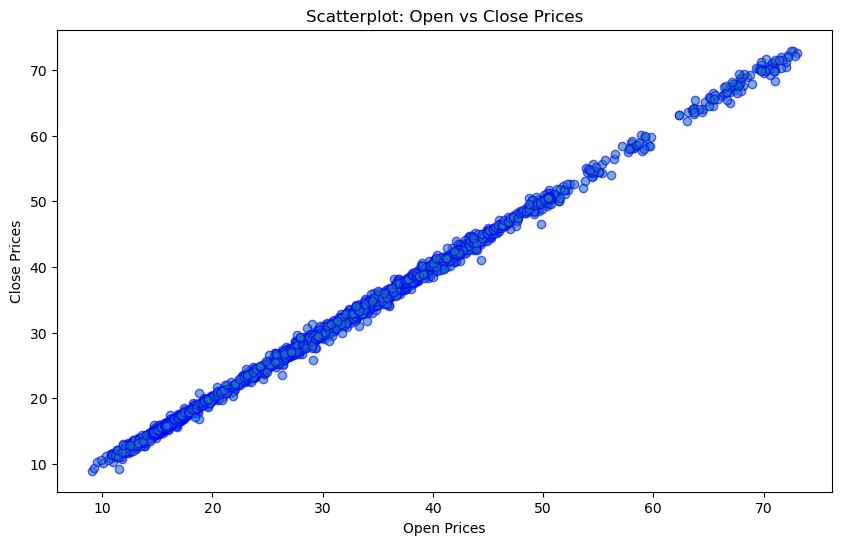

In [67]:
# Scatterplot of 'High' vs 'Low' prices to visually inspect the correlation
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], alpha=0.6, edgecolors='b')
plt.title('Scatterplot: Open vs Close Prices')
plt.xlabel('Open Prices')
plt.ylabel('Close Prices')
plt.show()
